In [68]:
! pip install scikit-plot
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,cross_val_score
import pandas as pd
import numpy as np
import os 
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import euclidean
from scikitplot.metrics import plot_roc_curve
plt.rcParams['figure.figsize']=[6,6]

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
x = np.load('D:\\ML-Class\\Data Sets\\Sign_Language_Digit\\X.npy')
y = np.load('D:\\ML-Class\\Data Sets\\Sign_Language_Digit\\Y.npy')

In [26]:
x.shape

(2062, 64, 64)

In [27]:
imgs =[]
for x1 in x:
    imgs.append(x1.reshape(1,-1))

In [33]:
x1 = np.array(imgs).reshape(2062,4096)

x1.shape

(2062, 4096)

In [47]:
y1 =[]
for h in range(len(y)):
    index=0
    for val in y[h]:
        if val!=1:
            index = index+1
        else:
            y1.append(index+1)

y1 = np.array(y1).reshape(-1,1)        
        

# 1.	Tabulate different classifiers result on the provided data.

In [53]:
#Logistic Regression
reg = LogisticRegression()

x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.3,random_state = 42)
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)
acc_log = accuracy_score(y_test,y_predict)
acc_log = round(acc_log,2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.73

In [54]:
#Decision Tree
cls = DecisionTreeClassifier(criterion='entropy',max_depth=19,min_samples_split=5)

cls.fit(x_train,y_train)
pred = cls.predict(x_test)
acc_tree = accuracy_score(y_test,pred)
acc_tree = round(acc_tree,2)
acc_tree

0.57

In [55]:
#Random Forest

rf = RandomForestClassifier(random_state=42,n_estimators=700,n_jobs=2)
rf.fit(x_train,y_train)

predict = rf.predict(x_test)
rf_acc = accuracy_score(predict,y_test)
rf_acc = round(rf_acc,2)
print(rf_acc)
important_features = rf.feature_importances_
#important_features
indices = np.argsort(important_features)[::-1]
indices

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.79


array([1304, 1809, 1431, ..., 3194, 3271,   78], dtype=int64)

# 4.	Apply hyper parameter tuning to improve the performance of the classifiers.

In [56]:

#Gridsearch CV
params1 = {'n_estimators':[int(x) for x in np.linspace(start=100,stop=1000,num=10)]}
rf_grid = GridSearchCV(rf,param_grid=params1,cv=3,scoring='accuracy')
rf_grid.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=2,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [55]:
rf_grid.best_params_

{'n_estimators': 700}

In [57]:
#Ada Boost

ab = AdaBoostClassifier(random_state=42,n_estimators=1000)
ab.fit(x_train,y_train)
pcap = ab.predict(x_test)
ab_acc = accuracy_score(y_test,pcap)
ab_acc = round(ab_acc,2)
ab_acc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33

In [58]:
#Naive

bernouli = BernoulliNB()
bernouli.fit(x_train,y_train)
bernouli_pred = bernouli.predict(x_test)
bernouli_acc = accuracy_score(bernouli_pred,y_test)
bernouli_acc = round(bernouli_acc,2)
print(bernouli_acc)



multi = MultinomialNB()
multi.fit(x_train,y_train)
multi_pred = multi.predict(x_test)
multi_acc = accuracy_score(multi_pred,y_test)
multi_acc = round(multi_acc,2)
print(multi_acc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08
0.59


In [59]:
g = np.array([acc_log,acc_tree,rf_acc,ab_acc,multi_acc,bernouli_acc])*100

In [60]:
c = np.array(['Logistic Regression','Decision Tree classifier','Random Forest Classifier','AdaBoost Classifier',
                         'MultinomialNB Classifier','BernouliNB Classifier'])

Text(0.5,0,"['Logistic Regression' 'Decision Tree classifier'\n 'Random Forest Classifier' 'AdaBoost Classifier'\n 'MultinomialNB Classifier' 'BernouliNB Classifier']")

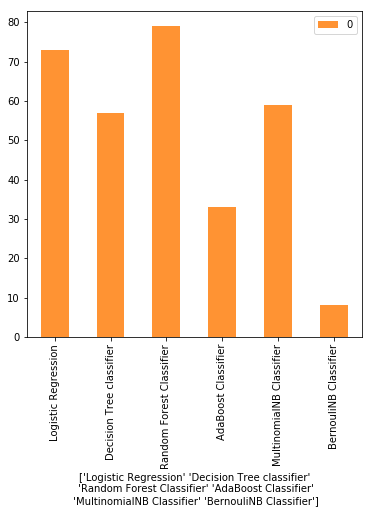

In [61]:
Classifier = pd.DataFrame(g,c)
Classifier.plot(kind ='bar',color='#FF9333')
plt.xlabel(c)



In [62]:
Classifier.columns = ['Accuracy']
Classifier

,Accuracy
Logistic Regression,73.0
Decision Tree classifier,57.0
Random Forest Classifier,79.0
AdaBoost Classifier,33.0
MultinomialNB Classifier,59.0
BernouliNB Classifier,8.0


# 2.	Plot the multi class ROC curve.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


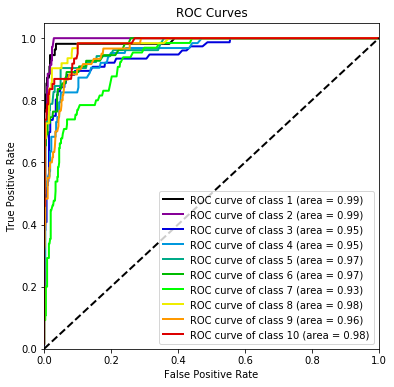

In [72]:
plot_roc_curve(y_test,rf.predict_proba(x_test),curves = 'each_class')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


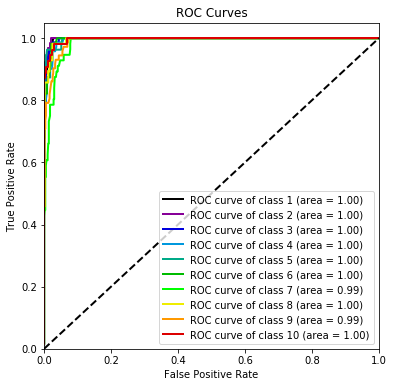

In [73]:
plot_roc_curve(predict,rf.predict_proba(x_test),curves = 'each_class')

# 3.	Compare the results of train-test split and CV fold.

In [74]:
kfold = KFold(n_splits=5,shuffle=True)
result = cross_val_score(rf,x_train,y_train,cv=kfold,scoring='accuracy')
result

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

array([0.77508651, 0.78546713, 0.75778547, 0.74305556, 0.78819444])

In [75]:
result.mean()

0.7699178200692043

- compared to CV Kfold and can observe CV is giving better result with 700 estimators

# 5.	Test the model with your own sign image captured with your mobile cam (you must perform required pre-processing steps).

In [86]:
a = plt.imread('Assign.jpeg')
a.shape

(64, 64, 3)

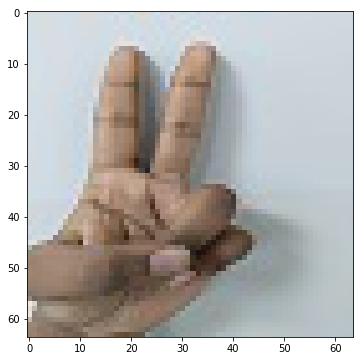

In [87]:
plt.imshow(a)

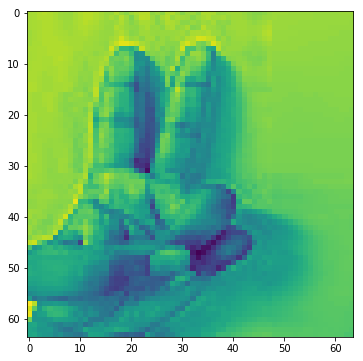

In [88]:
a = a[:,:,0]
plt.imshow(a)

In [91]:
rf.predict(a.reshape(1,-1))

array([2])

 - Predicted correctly

# 6.	Extract and display all the wrongly classified 8’s

In [92]:
sample = pd.DataFrame(y_test,predict)

In [95]:
sample['original'] = sample.index 

In [100]:
sample = sample.reset_index()

In [101]:
sample =sample.drop(['index'],axis=1)

In [102]:
sample.head()

,0,original
0,7,4
1,10,10
2,4,4
3,10,10
4,1,1


In [106]:
sample.columns = ['Predicted','original' ]
sample.head()

,Predicted,original
0,7,4
1,10,10
2,4,4
3,10,10
4,1,1


- Wrongly predicted 8's'

In [107]:
sample[(sample['Predicted']!=8) & (sample['original']==8)]

,Predicted,original
240,10,8
249,10,8
327,10,8
521,10,8
